In [ ]:
!pip install cdflib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 kB 688.5 kB/s eta 0:00:00


In [1]:
import os
#import cdflib
import datetime
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
ds = xr.open_dataset('/content/gdrive/MyDrive/msci_satellite_data/nasa/s006.nc')
mats = xr.open_dataset('/content/gdrive/MyDrive/msci_satellite_data/matsuo_tiegcm_ose/tiegcm_s_ensmean.nc.00')
#tru = xr.open_dataset('/content/gdrive/MyDrive/msci_satellite_data/matsuo_tiegcm_truth/tiegcm_s.nc.true')

In [15]:
mats.ctpoten.values

array([30.        , 47.49252133, 47.49252133, 47.49252133, 47.49252133,
       47.49252133, 47.49252133, 47.49252133, 47.49252133, 47.49252133,
       47.49252133, 47.49252133, 47.49252133, 47.49252133, 47.49252133,
       47.49252133, 47.49252133])

455.5016


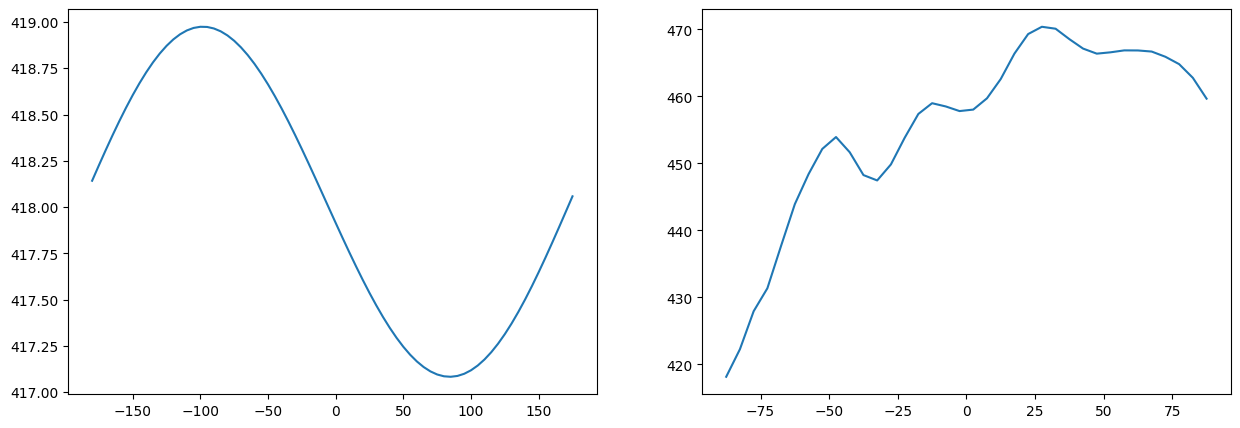

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
pressure_level = 26
axs[0].plot(mats.lon, mats.ZG.values[1,pressure_level,0,:]/100000)
axs[1].plot(mats.lat, mats.ZG.values[1,pressure_level,:,0]/100000)
print(np.mean(mats.ZG.values[1,pressure_level,:,0])/100000)

In [ ]:
a = []
for i in np.arange(0,29,1):
    a.append(np.min(mats.ZG.values[1,i,:,:])/100000)

print(a)

[95.80898, 98.38841, 100.80246, 103.41852, 106.2991, 109.69781, 114.1485, 119.90585, 127.03063, 135.63115, 145.64591, 156.63412, 168.78362, 182.05856, 196.27004, 211.345, 227.1238, 243.5177, 259.98888, 277.2732, 295.3202, 314.05438, 332.93812, 351.6812, 370.56328, 389.45528, 408.34064, 427.27596, 436.7436]


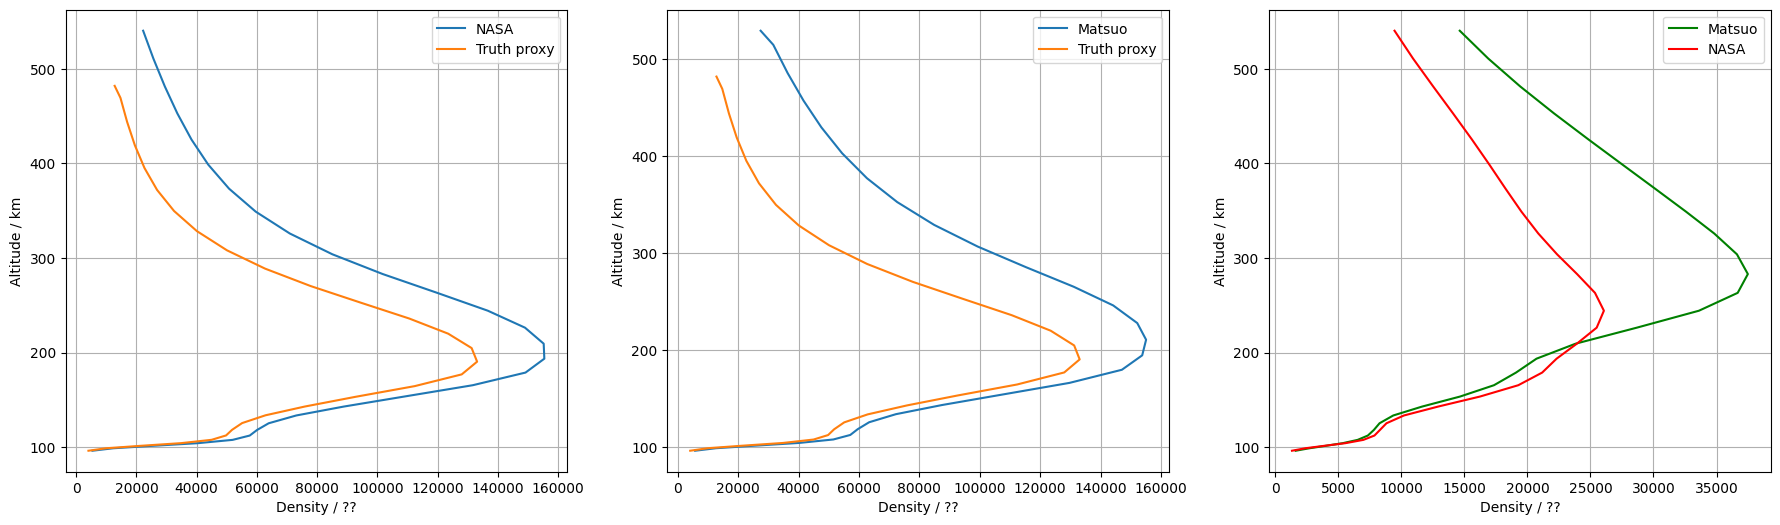

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(22,6))
lat = 35
lon = 40
axs[0].plot(ds.NE[-1,:,lat,lon], ds.ZG[-1,:,lat,lon]/100000, label='NASA')
axs[0].plot(tru.NE[24,:,lat,lon], tru.ZG[24,:,lat,lon]/100000, label='Truth proxy')
axs[1].plot(mats.NE[-1,:,lat,lon], mats.ZG[-1,:,lat,lon]/100000, label='Matsuo')
axs[1].plot(tru.NE[24,:,lat,lon], tru.ZG[24,:,lat,lon]/100000, label='Truth proxy')
#axs[2].plot(abs(mats.NE[-1,:,lat,lon] - ds.NE[-1,:,lat,lon]), ds.ZG[-1,:,lat,lon]/100000, 'g', label='Difference (NASA heights)')
#axs[2].plot(abs(mats.NE[-1,:,lat,lon] - ds.NE[-1,:,lat,lon]), mats.ZG[-1,:,lat,lon]/100000, 'r', label='Difference (Matsuo heights)')
axs[2].plot((mats.NE[-1,:,lat,lon] - tru.NE[24,:,lat,lon]), ds.ZG[-1,:,lat,lon]/100000, 'g', label='Matsuo')
axs[2].plot((ds.NE[-1,:,lat,lon] - tru.NE[24,:,lat,lon]), ds.ZG[-1,:,lat,lon]/100000, 'r', label='NASA')
axs[0].set_ylabel('Altitude / km')
axs[0].set_xlabel('Density / ??')
axs[0].legend()
axs[0].grid(True)
axs[1].set_ylabel('Altitude / km')
axs[1].set_xlabel('Density / ??')
axs[1].legend()
axs[1].grid(True)
axs[2].set_ylabel('Altitude / km')
axs[2].set_xlabel('Density / ??')
axs[2].legend()
axs[2].grid(True)
plt.show()

In [ ]:
def extract(filename):
  pattern = r'\.(\d{2})\.(\d{2})\.'
  match = re.search(pattern, filename)
  hour = None
  minute = None
  if match:
      hour = match.group(1)  # Extract the hour
      minute = match.group(2)  # Extract the minute
  return hour, minute

In [7]:
def gps_to_utc(gps_seconds):
    # GPS epoch starts from January 6, 1980
    gps_epoch = datetime.datetime(1980, 1, 6)
    # Convert GPS seconds to timedelta
    delta = datetime.timedelta(seconds=gps_seconds)
    # Calculate the UTC time
    utc_time = gps_epoch + delta
    return utc_time

In [8]:
difference = []
length = []
for k in np.arange(1,7,1):
    folder = '/content/gdrive/MyDrive/msci_satellite_data/cosmic/.ionPrf_postProc_2008_175/23sat'+f'{k}'
    filenames = []
    for file in os.listdir(folder):
        filename = os.fsdecode(file)
        filenames.append(filename)

    for i in filenames:
        ds1 = xr.open_dataset(folder + '/' + i)
        start_time = gps_to_utc(ds1.toptime)
        end_time = gps_to_utc(ds1.bottime)
        duration = end_time - start_time
        duration1 = duration.total_seconds()
        difference.append(abs(duration1))
        length.append(len(ds1.MSL_alt))

    print(k)

1
2
3
4
5
6


In [9]:
print(f'Mean occultation duration: {np.mean(difference)/60} +/- {(0.5*(max(difference)-min(difference)))/60} mins')
print(f'Mean occultation duration: {np.mean(difference)/60} +/- {np.std(difference)/60} mins')
print(f'Mean occultation duration: {np.mean(difference)/60} +/- {(np.std(difference)/np.sqrt(len(difference)))/60} mins')
print(f'Mean amount of data: {np.mean(length)}')

Mean occultation duration: 9.390431296055484 +/- 8.891666666666667 mins
Mean occultation duration: 9.390431296055484 +/- 1.8189019053794648 mins
Mean occultation duration: 9.390431296055484 +/- 0.04638003907191945 mins
Mean amount of data: 447.5039011703511


In [ ]:
np.mean(difference)/60

9.390431296055484

In [4]:
c = xr.open_dataset('/content/gdrive/MyDrive/msci_satellite_data/cosmic/.ionPrf_postProc_2008_175/23sat4/ionPrf_C004.2008.175.11.20.G32_2021.0390_nc')

In [5]:
c

<xarray.Dataset>
Dimensions:    (MSL_alt: 414)
Coordinates:
  * MSL_alt    (MSL_alt) float32 1.077 3.853 6.625 9.393 ... 770.1 771.2 772.4
Data variables:
    GEO_lat    (MSL_alt) float32 ...
    GEO_lon    (MSL_alt) float32 ...
    OCC_azi    (MSL_alt) float32 ...
    TEC_cal    (MSL_alt) float32 ...
    ELEC_dens  (MSL_alt) float32 ...
Attributes: (12/51)
    occ_id:            0
    fiducial_id:           
    reference_sat_id:  -999
    occulting_sat_id:  32
    year:              2008
    month:             6
    ...                ...
    fileStamp:         C004.2008.175.11.20.G32
    inverter:          gmrion
    parmsfile:         parms8
    center:            UCAR/CDAAC
    mission:           COSMIC
    creation_time:     11-FEB-21 23:43

In [ ]:
import numpy as np

def mean_adjacent_difference(arr):
    # Calculate the absolute differences between adjacent elements
    differences = np.abs(np.diff(arr))

    # Compute the mean of the differences
    mean_difference = np.mean(differences)

    return mean_difference

# Example usage:
arr = np.array([1, 3, 6, 10, 15])  # Example array
result = mean_adjacent_difference(c.MSL_alt.values)
print("Mean difference between adjacent elements:", result)

Mean difference between adjacent elements: 1.867523


In [ ]:
champ = cdflib.CDF('/content/gdrive/MyDrive/msci_satellite_data/champ/CH_OPER_DNS_ACC_2__20080623T000000_20080623T235959_0001.cdf')

In [ ]:
champ.cdf_info()

CDFInfo(CDF=PosixPath('/content/gdrive/MyDrive/msci_satellite_data/champ/CH_OPER_DNS_ACC_2__20080623T000000_20080623T235959_0001.cdf'), Version='3.6.3', Encoding=6, Majority='Row_major', rVariables=[], zVariables=['time', 'altitude', 'longitude', 'latitude', 'local_solar_time', 'density', 'density_orbitmean', 'validity_flag', 'validity_flag_orbitmean'], Attributes=[{'TITLE': 'Global'}, {'ORIGINAL_PRODUCT_NAME': 'Global'}, {'CREATOR': 'Global'}, {'TIME SYSTEM': 'Global'}, {'VARIABLE DESCRIPTION': 'Variable'}, {'UNITS': 'Variable'}, {'FORMAT': 'Variable'}, {'FILLVAL': 'Variable'}, {'SATELLITE': 'Global'}, {'DESCRIPTION': 'Global'}, {'FILE_NAME': 'Global'}, {'MISSION': 'Global'}, {'PROCESSING_CENTRE': 'Global'}, {'PROCESSING_TIME': 'Global'}, {'SOFTWARE_VERSION': 'Global'}, {'INPUT_FILES': 'Global'}], Copyright='\nCommon Data Format (CDF)\n(C) Copyright 1990-2016 NASA/GSFC\nSpace Physics Data Facility\nNASA/Goddard Space Flight Center\nGreenbelt, Maryland 20771 USA\n(Internet -- GSFC-CDF-